In [1]:
! pip install pytrends

In [2]:
! pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

  Cloning https://github.com/GeneralMills/pytrends to /private/var/folders/9y/rl9qxcds3qv5bs2m754z2jv40000gn/T/pip-req-build-a3g3flhn
  Running command git clone -q https://github.com/GeneralMills/pytrends /private/var/folders/9y/rl9qxcds3qv5bs2m754z2jv40000gn/T/pip-req-build-a3g3flhn
  Created wheel for pytrends: filename=pytrends-4.7.2-py3-none-any.whl size=14820 sha256=d1a9144f5f4a4d807dedd7184751024c55049b042076cb55858c68ff832d6a72
  Stored in directory: /private/var/folders/9y/rl9qxcds3qv5bs2m754z2jv40000gn/T/pip-ephem-wheel-cache-aj1zfws6/wheels/c1/65/c5/60688c4521e16561ac09af949eb432957b257dfda14c4fe516
Successfully built pytrends
  Attempting uninstall: pytrends
    Found existing installation: pytrends 4.7.2
    Uninstalling pytrends-4.7.2:
      Successfully uninstalled pytrends-4.7.2


In [3]:
from pytrends.request import TrendReq
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import csv
import calendar

# time ranges

In [4]:
time_ranges = []
for y in range(2011,2021):
    for m in range(1,13):
        monthrange = calendar.monthrange(y, m)
        start_day = "%d-%d-%d" %(y,m,1)
        end_day = "%d-%d-%d" %(y,m,monthrange[1])
        s_e_day = start_day +" " + end_day
        time_ranges.append(s_e_day)


print(time_ranges)

['2011-1-1 2011-1-31', '2011-2-1 2011-2-28', '2011-3-1 2011-3-31', '2011-4-1 2011-4-30', '2011-5-1 2011-5-31', '2011-6-1 2011-6-30', '2011-7-1 2011-7-31', '2011-8-1 2011-8-31', '2011-9-1 2011-9-30', '2011-10-1 2011-10-31', '2011-11-1 2011-11-30', '2011-12-1 2011-12-31', '2012-1-1 2012-1-31', '2012-2-1 2012-2-29', '2012-3-1 2012-3-31', '2012-4-1 2012-4-30', '2012-5-1 2012-5-31', '2012-6-1 2012-6-30', '2012-7-1 2012-7-31', '2012-8-1 2012-8-31', '2012-9-1 2012-9-30', '2012-10-1 2012-10-31', '2012-11-1 2012-11-30', '2012-12-1 2012-12-31', '2013-1-1 2013-1-31', '2013-2-1 2013-2-28', '2013-3-1 2013-3-31', '2013-4-1 2013-4-30', '2013-5-1 2013-5-31', '2013-6-1 2013-6-30', '2013-7-1 2013-7-31', '2013-8-1 2013-8-31', '2013-9-1 2013-9-30', '2013-10-1 2013-10-31', '2013-11-1 2013-11-30', '2013-12-1 2013-12-31', '2014-1-1 2014-1-31', '2014-2-1 2014-2-28', '2014-3-1 2014-3-31', '2014-4-1 2014-4-30', '2014-5-1 2014-5-31', '2014-6-1 2014-6-30', '2014-7-1 2014-7-31', '2014-8-1 2014-8-31', '2014-9-1 201

In [5]:
time_ranges = time_ranges[0:-8]

# data collecting

In [13]:
keywords = ['Microsoft','Apple']

# monthly daya for past 100 years
for key in keywords:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
    data_key_all_days= pytrends.interest_over_time()


    globals()[key+'_all'] = pd.DataFrame()   

    for day in time_ranges:   
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
        df_day = pytrends.interest_over_time()

        #Calculation final value = daily value*(monthly value/100)
        Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
        df_day = df_day*Monthly_rate_percent
        globals()[key+'_all'] = globals()[key+'_all'].append(df_day)
    del globals()[key+'_all']['isPartial']

In [23]:
df_day

,Apple,isPartial
date,,
2020-04-01,32.25,0.0
2020-04-02,32.25,0.0
2020-04-03,32.25,0.0
2020-04-04,34.40,0.0
2020-04-05,33.97,0.0
2020-04-06,31.39,0.0
2020-04-07,32.25,0.0
2020-04-08,32.25,0.0
2020-04-09,33.11,0.0


In [24]:
data_key_all_days

,Apple,isPartial
date,,
2011-01-01,32,False
2011-02-01,30,False
2011-03-01,36,False
2011-04-01,32,False
2011-05-01,31,False
...,...,...
2019-12-01,55,False
2020-01-01,43,False
2020-02-01,39,False


In [15]:
Microsoft_all

,Microsoft
date,
2011-01-01,66.00
2011-01-02,68.00
2011-01-03,88.00
2011-01-04,94.00
2011-01-05,95.00
...,...
2020-04-23,64.24
2020-04-24,59.13
2020-04-25,35.04


In [18]:
Apple_all

,Apple
date,
2011-01-01,30.40
2011-01-02,32.00
2011-01-03,29.12
2011-01-04,27.52
2011-01-05,26.24
...,...
2020-04-23,36.55
2020-04-24,36.55
2020-04-25,39.13


In [16]:
df = pd.concat([Microsoft_all,Apple_all],axis=1)

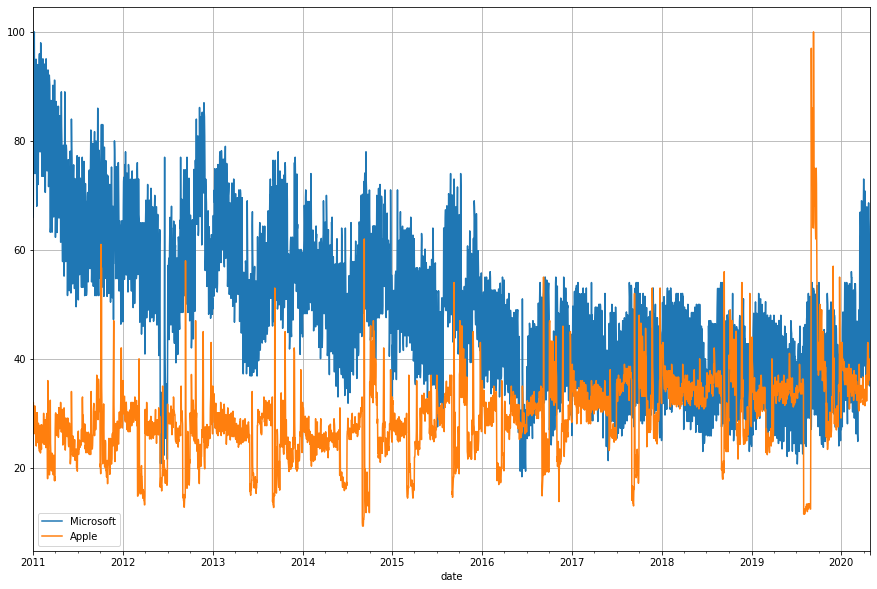

In [22]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['axes.grid'] = True 
df.plot()

In [19]:
df.to_csv("Microsoft_Apple_sample.csv", encoding = "utf-8")

In [25]:
df

,Microsoft,Apple
date,,
2011-01-01,66.00,30.40
2011-01-02,68.00,32.00
2011-01-03,88.00,29.12
2011-01-04,94.00,27.52
2011-01-05,95.00,26.24
...,...,...
2020-04-23,64.24,36.55
2020-04-24,59.13,36.55
2020-04-25,35.04,39.13


In [9]:
# keywords = ['Covid_19','Pandemic']

# # monthly daya for past 100 years
# for key in keywords:
#     pytrends = TrendReq(hl='en-US', tz=360)
#     pytrends.build_payload([key], timeframe='2011-1-1 2020-4-29', geo= 'US', gprop ='')
#     data_key_all_days= pytrends.interest_over_time()


#     globals()[key+'_all'] = pd.DataFrame()   

#     for day in time_ranges:   
#         pytrends = TrendReq(hl='en-US', tz=360)
#         pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
#         df_day = pytrends.interest_over_time()

#         #Calculation final value = daily value*(monthly value/100)
#         Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
#         df_day = df_day*Monthly_rate_percent
#         globals()[key+'_all'] = globals()[key+'_all'].append(df_day)
#     del globals()[key+'_all']['isPartial']

In [ ]:
# keywords = [['Microsoft Corp.','Microsoft'],['Apple, Inc.','Apple'], ['Amazon.com, Inc.', 'Amazon'],['Google','Google'], ['Facebook', 'Facebook'], ['Berkshire Hathaway, Inc.','Berkshire_Hathaway'],
#             ['Johnson & Johnson','Johnson_Johnson'],['Walmart, Inc.','Walmart'],['Visa, Inc.','Visa'],['Procter & Gamble Co.', 'Procter_Gamble'],['JPMorgan Chase & Co.','JPMorgan_Chase']]

In [ ]:
# keywords = ['Microsoft','Apple', 'Amazon','Google', 'Facebook', 'Berkshire Hathaway','Johnson & Johnson','Walmart','Visa','Procter & Gamble','JPMorgan Chase']

# 'Covid 19','Pandemic','presidential election', 'Lockdown'


In [ ]:
test_range = time_ranges[0:2]

In [13]:
keywords = [['Google','Google']]

# monthly daya for past 100 years
for key,df_name in keywords:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
    data_key_all_days= pytrends.interest_over_time()


    globals()[df_name+'_all'] = pd.DataFrame()   

    for day in time_ranges:   
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
        df_day = pytrends.interest_over_time()

        #Calculation final value = daily value*(monthly value/100)
        Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
        df_day = df_day*Monthly_rate_percent
        globals()[df_name+'_all'] = globals()[df_name+'_all'].append(df_day)
    del globals()[df_name+'_all']['isPartial']
    
    globals()[df_name+'_all'].to_csv(df_name+".csv", encoding = "utf-8")

In [12]:
Apple_all

,Apple
date,
2011-01-01,31.02
2011-01-02,32.01
2011-01-03,29.04
2011-01-04,28.71
2011-01-05,27.39
...,...
2020-04-23,37.84
2020-04-24,39.16
2020-04-25,41.36


In [ ]:
# keyword, df name
[['Microsoft','Microsoft'],
['Apple','Apple'],
['Amazon','Amazon'],
['Google','Google'],
['Facebook','Facebook'],
['Johnson & Johnson','Johnson_and_Johnson'],
 
['Walmart','Walmart'], 
['Procter & Gamble','Procter_and_Gamble'],
['JPMorgan Chase','JPMorgan_Chase'],
 
['UnitedHealth Group','UnitedHealth_Group'],
['Intel','Intel'],
['Verizon','Verizon'],
 
['AT&T','AT_T'],
['The Home Depot','The_Home_Depot'],
['Merck','Merck'],
 
['Pfizer','Pfizer'], 
['CocaCola','CocaCola'],
['Bank of America','Bank_of_America'],
 
['Netflix','Netflix'],
['Pepsi','Pepsi'],
['Disney','The_Walt_Disney'],
 
['Cisco','Cisco_Systems'],
['NVIDIA','NVIDIA'],
['Exxon','Exxon_Mobil'],
 
['Abbott Laboratories','Abbott_Laboratories'],
['Oracle','Oracle'],
['Comcast','Comcast'],
 
['Adobe','Adobe'],
['Chevron','Chevron'],
['Eli Lilly','Eli_Lilly']
 
['Covid-19','Covid_19'],
 
['Pandemic','Pandemic'],
['presidential election','presidential_election'], 
['Lockdown','Lockdown']]

In [14]:
keywords = [['Facebook','Facebook'],
['Johnson & Johnson','Johnson_and_Johnson'],
['Walmart','Walmart']]

# monthly daya for past 100 years
for key,df_name in keywords:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
    data_key_all_days= pytrends.interest_over_time()


    globals()[df_name+'_all'] = pd.DataFrame()   

    for day in time_ranges:   
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
        df_day = pytrends.interest_over_time()

        #Calculation final value = daily value*(monthly value/100)
        Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
        df_day = df_day*Monthly_rate_percent
        globals()[df_name+'_all'] = globals()[df_name+'_all'].append(df_day)
    del globals()[df_name+'_all']['isPartial']
    
    globals()[df_name+'_all'].to_csv(df_name+".csv", encoding = "utf-8")

In [15]:
keywords = [['Pandemic','Pandemic'],
['presidential election','presidential_election'], 
['Lockdown','Lockdown']]

# monthly daya for past 100 years
for key,df_name in keywords:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
    data_key_all_days= pytrends.interest_over_time()


    globals()[df_name+'_all'] = pd.DataFrame()   

    for day in time_ranges:   
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
        df_day = pytrends.interest_over_time()

        #Calculation final value = daily value*(monthly value/100)
        Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
        df_day = df_day*Monthly_rate_percent
        globals()[df_name+'_all'] = globals()[df_name+'_all'].append(df_day)
    del globals()[df_name+'_all']['isPartial']
    
    globals()[df_name+'_all'].to_csv(df_name+".csv", encoding = "utf-8")

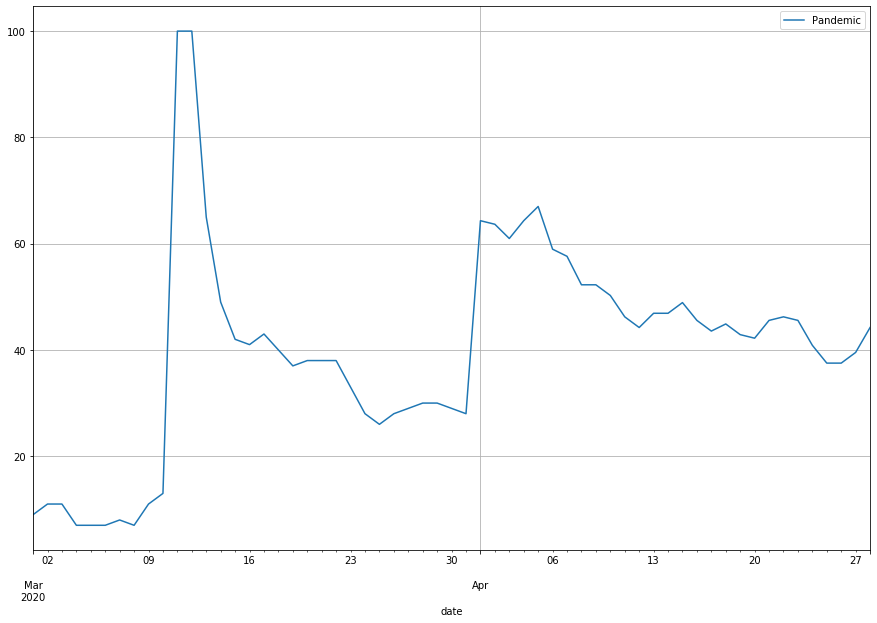

In [20]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['axes.grid'] = True 
Pandemic_all[-60:-1].plot()

In [21]:
df_sam = pd.concat([Pandemic_all,Lockdown_all],axis=1)

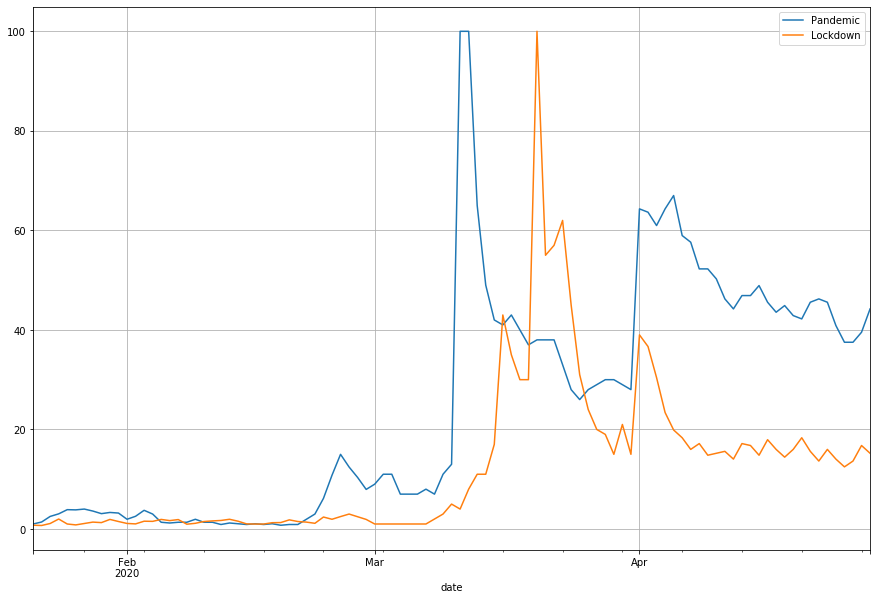

In [23]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['axes.grid'] = True 
df_sam[-100:-1].plot()

In [ ]:


# Face masks,Coronavirus, social distancing, Quarantine, EDD, unimployment check, unimployment benefits,sba loans



In [24]:
df_sam

,Pandemic,Lockdown
date,,
2011-01-01,1.14,0.52
2011-01-02,1.06,0.52
2011-01-03,1.04,0.70
2011-01-04,1.08,0.62
2011-01-05,1.54,0.88
...,...,...
2020-04-25,37.52,12.48
2020-04-26,37.52,13.65
2020-04-27,39.53,16.77


In [25]:
# [['Face masks','Face_masks'],
# ['Coronavirus','Coronavirus'], 
# ['Quarantine','Quarantine']
# ['social distancing','social_distancing']           
# ['EDD','EDD']           
# ['unimployment check','unimployment_check']           
# ['unimployment benefits','unimployment_benefits']           
# ['sba loans','sba_loans']]

In [26]:
keywords = [['Face masks','Face_masks'],
['Coronavirus','Coronavirus'], 
['Quarantine','Quarantine']]

# monthly daya for past 100 years
for key,df_name in keywords:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
    data_key_all_days= pytrends.interest_over_time()


    globals()[df_name+'_all'] = pd.DataFrame()   

    for day in time_ranges:   
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
        df_day = pytrends.interest_over_time()

        #Calculation final value = daily value*(monthly value/100)
        Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
        df_day = df_day*Monthly_rate_percent
        globals()[df_name+'_all'] = globals()[df_name+'_all'].append(df_day)
    del globals()[df_name+'_all']['isPartial']
    
    globals()[df_name+'_all'].to_csv(df_name+".csv", encoding = "utf-8")

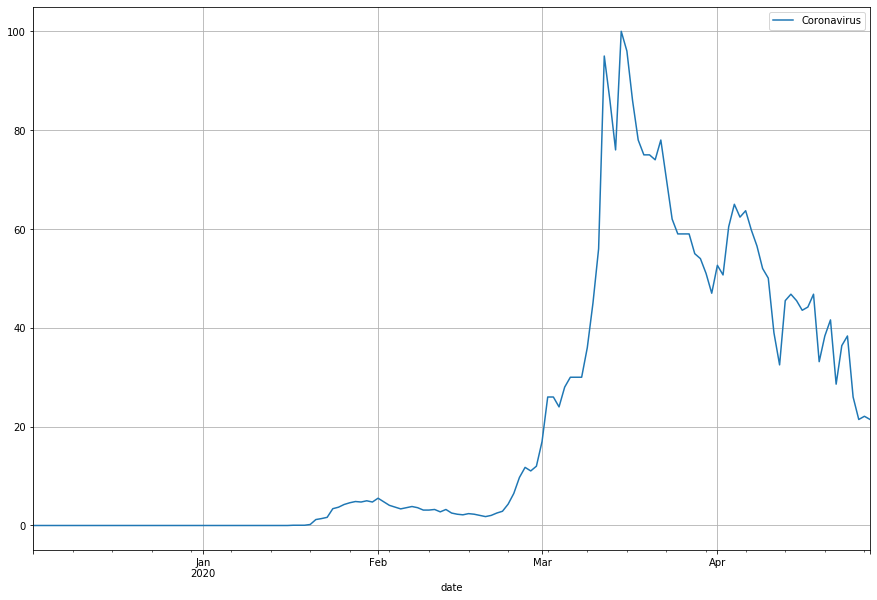

In [31]:
Coronavirus_all[-150:-1].plot()

In [32]:
df_sam = pd.concat([Pandemic_all,Lockdown_all,Coronavirus_all,Quarantine_all,Face_masks_all],axis=1)

In [ ]:
df_sam[-365:-1].plot()

In [6]:
keywords = [['NVIDIA','NVIDIA'],
['Exxon','Exxon_Mobil'],
['Abbott Laboratories','Abbott_Laboratories']]

# monthly daya for past 100 years
for key,df_name in keywords:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
    data_key_all_days= pytrends.interest_over_time()


    globals()[df_name+'_all'] = pd.DataFrame()   

    for day in time_ranges:   
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
        df_day = pytrends.interest_over_time()

        #Calculation final value = daily value*(monthly value/100)
        Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
        df_day = df_day*Monthly_rate_percent
        globals()[df_name+'_all'] = globals()[df_name+'_all'].append(df_day)
    del globals()[df_name+'_all']['isPartial']
    
    globals()[df_name+'_all'].to_csv(df_name+".csv", encoding = "utf-8")

In [7]:
NVIDIA_all

,NVIDIA
date,
2011-01-01,82.0
2011-01-02,100.0
2011-01-03,81.0
2011-01-04,78.0
2011-01-05,85.0
...,...
2020-04-25,59.5
2020-04-26,62.3
2020-04-27,60.9


In [21]:

keywords = [['Oracle','Oracle'],
['Comcast','Comcast'],
['Adobe','Adobe']]

# monthly daya for past 100 years
for key,df_name in keywords:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
    data_key_all_days= pytrends.interest_over_time()


    globals()[df_name+'_all'] = pd.DataFrame()   

    for day in time_ranges:   
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
        df_day = pytrends.interest_over_time()

        #Calculation final value = daily value*(monthly value/100)
        Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
        df_day = df_day*Monthly_rate_percent
        globals()[df_name+'_all'] = globals()[df_name+'_all'].append(df_day)
    del globals()[df_name+'_all']['isPartial']
    
    globals()[df_name+'_all'].to_csv(df_name+".csv", encoding = "utf-8")

In [12]:
EDD_all

,EDD
date,
2011-01-01,6.58
2011-01-02,7.28
2011-01-03,12.60
2011-01-04,13.16
2011-01-05,12.46
...,...
2020-04-25,45.00
2020-04-26,59.00
2020-04-27,73.00


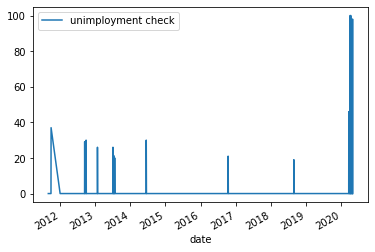

In [19]:
unimployment_check_all.plot()

In [33]:

keywords = [['Microsoft','Microsoft']]

# monthly daya for past 100 years
for key,df_name in keywords:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
    data_key_all_days= pytrends.interest_over_time()


    globals()[df_name+'_all'] = pd.DataFrame()   

    for day in time_ranges:   
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([key], timeframe=day, geo= 'US', gprop ='')
        df_day = pytrends.interest_over_time()

        #Calculation final value = daily value*(monthly value/100)
        Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
        df_day = df_day*Monthly_rate_percent
        globals()[df_name+'_all'] = globals()[df_name+'_all'].append(df_day)
    del globals()[df_name+'_all']['isPartial']
    
    globals()[df_name+'_all'].to_csv(df_name+".csv", encoding = "utf-8")

In [36]:
Microsoft_all

,Microsoft
date,
2011-01-01,61.00
2011-01-02,70.00
2011-01-03,86.00
2011-01-04,97.00
2011-01-05,96.00
...,...
2020-04-26,39.00
2020-04-27,66.00
2020-04-28,65.25


In [24]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(['Microsoft'], timeframe='2011-1-1 2020-4-30', geo= 'US', gprop ='')
data_key_all_days= pytrends.interest_over_time()
del data_key_all_days['isPartial']

In [25]:
data_key_all_days

,Microsoft
date,
2011-01-01,100
2011-02-01,96
2011-03-01,92
2011-04-01,90
2011-05-01,88
...,...
2019-12-01,49
2020-01-01,53
2020-02-01,55


In [31]:
Microsoft_all = pd.DataFrame()
for day in time_ranges:   
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload(['Microsoft'], timeframe=day, geo= 'US', gprop ='')
    df_day = pytrends.interest_over_time()

    #Calculation final value = daily value*(monthly value/100)
#     Monthly_rate_percent = data_key_all_days.loc[day[0:9],key]/100
#     df_day = df_day*Monthly_rate_percent
    Microsoft_all = Microsoft_all.append(df_day)
del Microsoft_all['isPartial']

In [32]:
Microsoft_all


,Microsoft
date,
2011-01-01,61
2011-01-02,70
2011-01-03,86
2011-01-04,97
2011-01-05,96
...,...
2020-04-26,52
2020-04-27,88
2020-04-28,87


In [34]:
Microsoft

NameError: name 'Microsoft' is not defined

In [ ]:
# keyword, df name
[['Microsoft','Microsoft'],
['Apple','Apple'],
# ['Amazon','Amazon'],
['Google','Google'],
['Facebook','Facebook'],
['Johnson & Johnson','Johnson_and_Johnson'],
 
['Walmart','Walmart'], 
# ['Procter & Gamble','Procter_and_Gamble'],
# ['JPMorgan Chase','JPMorgan_Chase'],
 
# ['UnitedHealth Group','UnitedHealth_Group'],
['Intel','Intel'],
# ['Verizon','Verizon'],
 
# ['AT&T','AT_T'],
['The Home Depot','The_Home_Depot'],
['Merck','Merck'],
 
['Pfizer','Pfizer'], 
['CocaCola','CocaCola'],
['Bank of America','Bank_of_America'],
 
['Netflix','Netflix'],
['Pepsi','Pepsi'],
['Disney','The_Walt_Disney'],
 
['Cisco','Cisco_Systems'],
['NVIDIA','NVIDIA'],
['Exxon','Exxon_Mobil'],
 
['Abbott Laboratories','Abbott_Laboratories'],
# ['Oracle','Oracle'],
# ['Comcast','Comcast'],
 
# ['Adobe','Adobe'],
['Chevron','Chevron'],
['Eli Lilly','Eli_Lilly']
 
['Covid-19','Covid_19'],
 
['Pandemic','Pandemic'],
['presidential election','presidential_election'], 
['Lockdown','Lockdown']]